<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Ghalia_4_2_exercice_arbre_de_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualisation de la frontière de décision

## Données

Afin de bien comprendre le comportement des algorithmes, on peut simuler des données qui ont des relations particulières.

In [ ]:

from sklearn.datasets import make_moons
import numpy as np


X, y = make_moons(n_samples=300, noise=0.25, random_state=2)


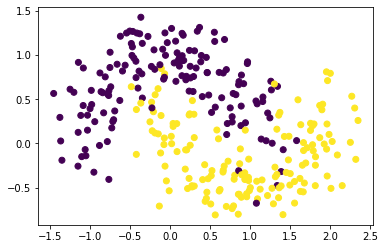

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)

## Construction du modèle

In [ ]:

from sklearn.tree import DecisionTreeClassifier



**Question** Construire un arbre de décision, on va appeler le modèle `tree_clf`.

In [ ]:

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X,y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Visualisation de la frontière de décision

Application du modèle et utiliser la fonction suivante pour visualiser la frontière de décision.

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=1, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#b8a3ff','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, alpha=0.8)
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], alpha=alpha,color="#530689")
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], alpha=alpha,color="#009838")
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

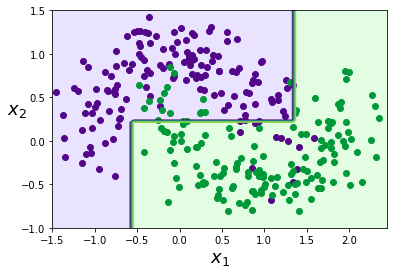

In [ ]:

plot_decision_boundary(tree_clf, X, y)

plt.show()

# Application à la base `breast_Cancer`

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer['data'], columns = cancer["feature_names"])
df["target"]=cancer['target']

Construire des arbres de décision avec des variables de votre choix.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3)

X=df[["mean radius"]]
y=df["target"]

dtc.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Changer le critère de construction de l'arbre



In [ ]:
dtc = DecisionTreeClassifier(max_depth=1)
dtc.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Modifier d'autres arguments comme `min_samples_split` et regarder les effets sur l'arbre

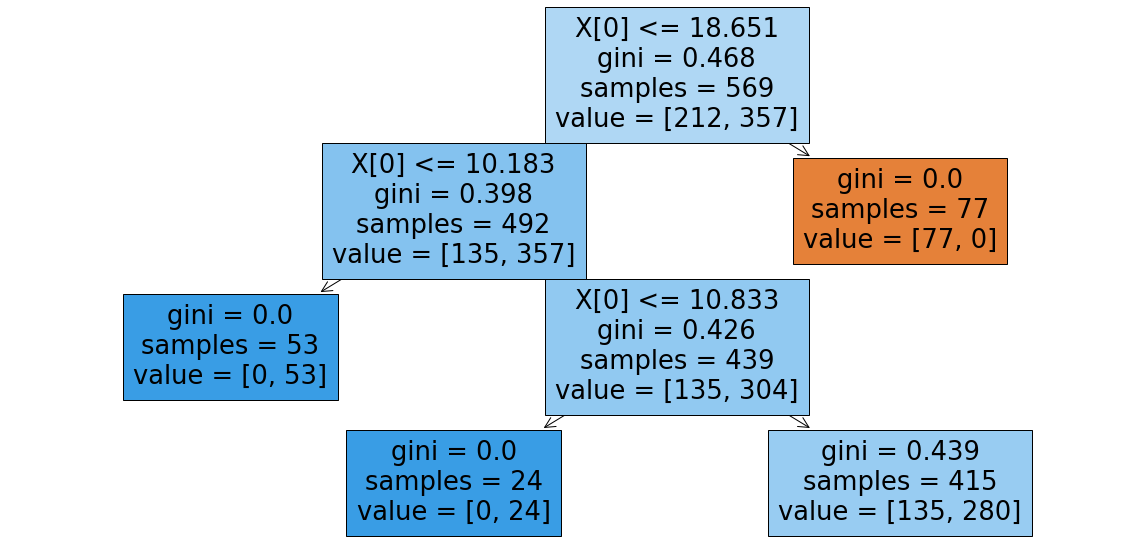

In [ ]:
dtc = DecisionTreeClassifier(max_leaf_nodes=4,min_samples_split=3,min_weight_fraction_leaf=0,max_features=1,splitter='random',criterion='gini',ccp_alpha=0.0)
dtc.fit(X,y)
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dtc,filled=True,impurity=True)
plt.show()